# Day 1
Fuente: https://datos.gob.es/es/catalogo/u01900001-uva-convocatorias-ayudas

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("uva-conv-ayudas-2021-22.csv")

In [7]:
df.head(5)

,anio,fecha_inicio_solicitudes,fecha_fin_solicitudes,cod_universidad,des_universidad,cod_convocatoria,des_convocatoria,nombre_convocatoria,cod_univ_aplicacion,des_univ_aplicacion,...,cod_req_nacionalidad,des_req_nacionalidad,ind_req_presencialidad,ind_req_credencial_becario,ind_req_desempleado,ind_complementaria,ind_incompatible,presupuesto_inicial,presupuesto_ejecutado,num_plazas
0,2021,20210429,20210607,19,Universidad de Valladolid,71019303,Ayudas para la formación de personal investiga...,Convocatoria para contratos predoctorales UVA,1,Públicas,...,0,No,SÍ,NO,NO,NO,SÍ,3789856.0,0,41.0
1,2021,20210126,20210222,19,Universidad de Valladolid,71019302,Master Uva-Banco Santander,Becas Iberoamérica+Asia/UVa - Banco Santander,1,Públicas,...,0,No,SÍ,NO,NO,NO,SÍ,NaN,NaN,30.0
2,2021,20210930,20211020,19,Universidad de Valladolid,71019306,Colaboración en tareas de investigación en Dep...,Colaboración investigación departamentos e Ins...,1,Públicas,...,0,No,NO,NO,NO,NO,SÍ,50000.0,"48373,18",35.0
3,2021,20220524,20231021,19,Universidad de Valladolid,71019309,Becas deportivas,Becas Deportivas,1,Públicas,...,0,No,NO,NO,NO,NO,NO,52000.0,"51999,6",150.0
4,2021,20210624,20210720,19,Universidad de Valladolid,71019322,Programa Embajadores,Programa Embajadores - Universidad de Valladolid,1,Públicas,...,0,No,SÍ,SÍ,NO,SÍ,NO,2000.0,NaN,20.0


In [8]:
df.dtypes

anio                          int64
fecha_inicio_solicitudes      int64
fecha_fin_solicitudes         int64
cod_universidad               int64
des_universidad              object
                             ...   
ind_complementaria           object
ind_incompatible             object
presupuesto_inicial         float64
presupuesto_ejecutado        object
num_plazas                  float64
Length: 64, dtype: object

In [9]:
import matplotlib.pyplot as plt

In [10]:
# Agrupar por catergorías
categorias = {
    "Ayudas Financieras o Complementarias": ["complementaria", "financiera", "ayuda", "apoyo"],
    "Becas Deportivas": ["deportivas", "deporte"],
    "Beca Iberoamérica+Asia/UVa": ["iberoamérica", "asia", "uva", "banco santander"],
    "Ayuda para Obtención del Certificado B2/C1": ["certificado", "b2", "c1", "idiomas"],
    "Becas de Colaboración STEM Women": ["stem", "women", "mujer", "científica"]
}

In [11]:
# Crear una nueva columna "Categoria" con el valor por defecto "Otras"
df['Categoria'] = "Otras"

In [12]:
# Clasificar cada registro en las categorías definidas
for categoria, palabras_clave in categorias.items():
    for palabra_clave in palabras_clave:
        condicion = df['nombre_convocatoria'].str.contains(palabra_clave, case=False, na=False) | df['des_convocatoria'].str.contains(palabra_clave, case=False, na=False)
        df.loc[condicion, 'Categoria'] = categoria

# Agrupar los datos por la nueva columna "Categoria"
categoria_counts = df['Categoria'].value_counts()

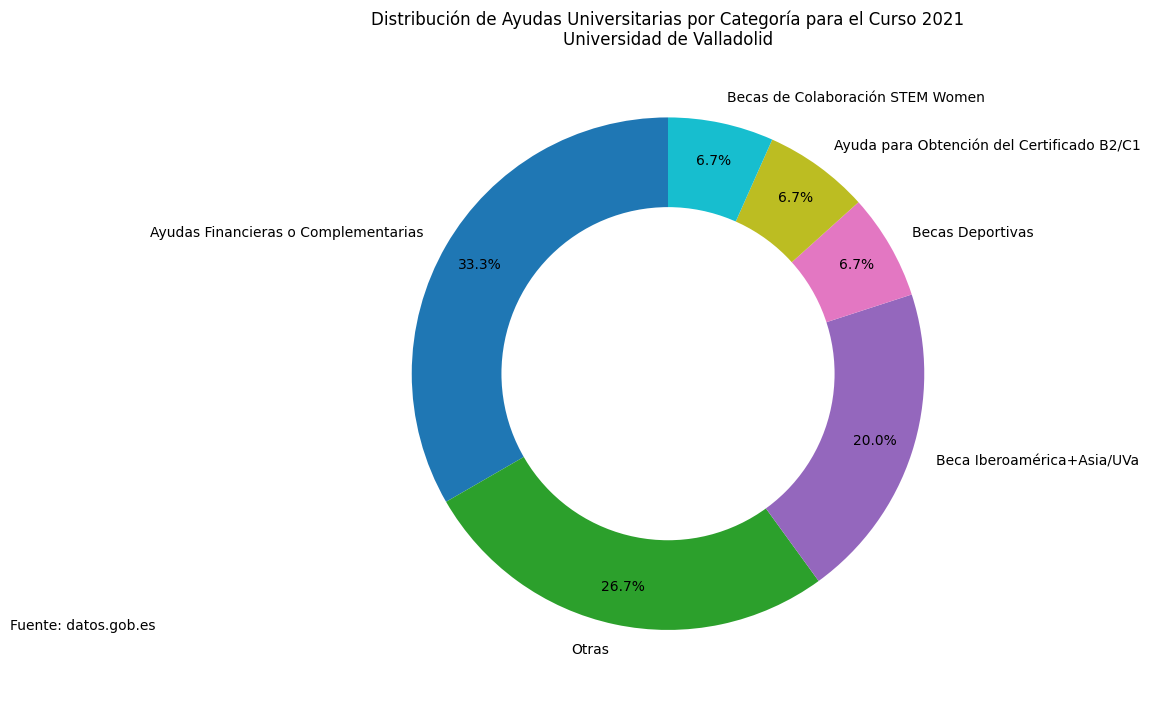

In [13]:
plt.figure(figsize=(10, 8))
categoria_counts.plot.pie(autopct='%1.1f%%', startangle=90, pctdistance=0.85, labels=categoria_counts.index, colormap='tab10')
plt.title('Distribución de Ayudas Universitarias por Categoría para el Curso 2021\nUniversidad de Valladolid')
plt.ylabel('')
plt.text(-2,-1,"Fuente: datos.gob.es", fontsize=10, color='black', ha='right')

# Convertir a pie chart
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Mostrar el gráfico
plt.tight_layout()
plt.show()